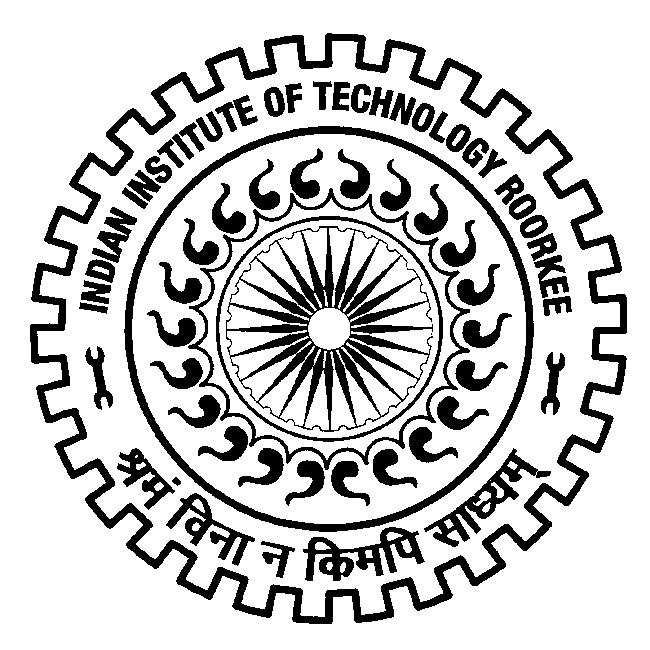 

<h2 style='text-align: center;'>In association with</h2>

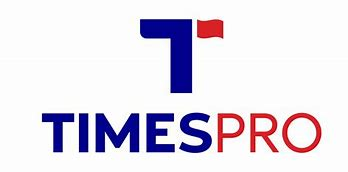

<h1 style='text-align: center;'> Capstone Project IIT-R : TSW</h1>

<h1 style='text-align: center;'>Reinforcement Learning : Q-Learning on OpenAI Gym Frozen Lake Problem</h1>

<h2 style='text-align: right;'>by Amitabh Suman</h2>
<h3 style='text-align: right;'>April 04, 2023</h3>




### Basic Imports

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Env Registration

In [2]:
from gym.envs.registration import register

try:
    register(
        id='Amitabh-FrozenLakeNotSlippery-v0',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name' : '4x4', 'is_slippery': False},
        max_episode_steps= 100,
        reward_threshold= 0.78
    )
except:
    print("Environment already created!")

### Make Env

In [3]:
env = gym.make("Amitabh-FrozenLakeNotSlippery-v0", render_mode="rgb_array")

In [4]:
env.action_space

Discrete(4)

In [5]:
env.action_space.n

4

In [6]:
env.observation_space

Discrete(16)

### Q learning Diagram

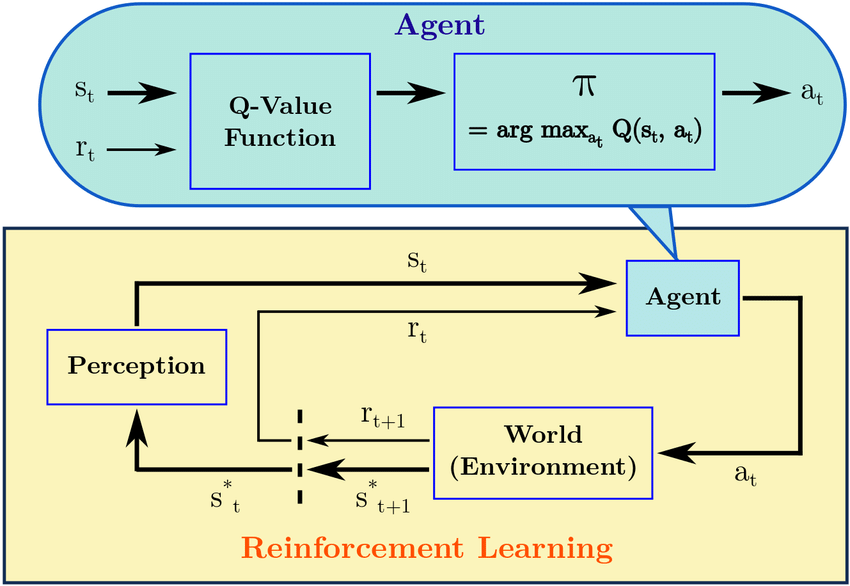

### Env reset to all zero / initial state

In [7]:
state = env.reset()

In [8]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [9]:
q_table.shape

(16, 4)

In [10]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [11]:
state

(0, {'prob': 1})

### Below function is a very raw, novice way to randomly select any action and perform on the environment. It has nothing to do with machine learning or any such thing. 

In [12]:
for episode in range(5):
    done = False
    state = env.reset()
    
    while not done:
        env.render()
        action = env.action_space.sample()
        state, reward, done, truncate, info = env.step(action)
        
env.close()

### Now lets implement it via code to see how machine learns to play this game and how can we teach the machine to do it
### Starting with the Q learning

### Things we need
### 1. EPSILON GREEDY METHOD
### 2. Function to compute optimal q value
### 3. Few necessary variables : EPSILON, discount factor GAMMA, lerning rate ALPHA and other for loop control and Epsilon decay

In [13]:
# PARAMETERS:
NUM_EPISODES = 20000
ALPHA = 0.01
GAMMA = 0.99
EPSILON = 1.0
MIN_EPSILON = 0.0
MAX_EPSILON = 1.0
EPSILON_DECAY = 0.001

In [14]:
def epsilon_greedy_action(q_table, state):
    random_val = np.random.random()
    if random_val > EPSILON:
        action = np.argmax(q_table[state, :]) # argmax gets me the action
    
    else:
        action = env.action_space.sample()
    return action

In [15]:
def compute_next_q_val(old_q_val, reward, next_optimal_q_val):
    return (old_q_val + ALPHA * (reward + (GAMMA * next_optimal_q_val) - old_q_val))

In [16]:
def reduce_epsilon(epsilon, episode):
    return (MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON)*np.exp(-EPSILON_DECAY*episode))

In [17]:
log_interval = 1000
rewards = []
for episode in range(NUM_EPISODES):
    done = False
    state = env.reset()
    state = state[0] if isinstance(state, tuple) else state
    total_rewards = 0
   
    
    while not done:
        env.render()
        
        # Choose an action and perform
        action = epsilon_greedy_action(q_table, state)
        next_state, reward, done, truncate, info = env.step(action)
        
        # Get old q val
        old_q_val = q_table[state, action]
        
        # Get next optimal q val
        next_optimal_q_val = np.max(q_table[next_state, :]) # whole row as we dont know what action is to be take.
        
        # Compute next q val
        new_q_val = compute_next_q_val(old_q_val, reward, next_optimal_q_val)
        
        # Update the q table
        q_table[state, action] = new_q_val
        
        
        # Update current state
        state = next_state
        
        # accumulate total reward
        total_rewards += reward

    # Decay EPSILON
    episode += episode
    EPSILON = reduce_epsilon(EPSILON, episode)
    rewards.append(total_rewards)
    
    if episode % log_interval == 0:
        print("EPISODE : ", episode, "  Reward : ", np.sum(rewards))
env.close()

EPISODE :  0   Reward :  0.0
EPISODE :  1000   Reward :  128.0
EPISODE :  2000   Reward :  496.0
EPISODE :  3000   Reward :  951.0
EPISODE :  4000   Reward :  1431.0
EPISODE :  5000   Reward :  1926.0
EPISODE :  6000   Reward :  2424.0
EPISODE :  7000   Reward :  2924.0
EPISODE :  8000   Reward :  3423.0
EPISODE :  9000   Reward :  3922.0
EPISODE :  10000   Reward :  4422.0
EPISODE :  11000   Reward :  4922.0
EPISODE :  12000   Reward :  5422.0
EPISODE :  13000   Reward :  5922.0
EPISODE :  14000   Reward :  6422.0
EPISODE :  15000   Reward :  6922.0
EPISODE :  16000   Reward :  7422.0
EPISODE :  17000   Reward :  7922.0
EPISODE :  18000   Reward :  8422.0
EPISODE :  19000   Reward :  8922.0
EPISODE :  20000   Reward :  9422.0
EPISODE :  21000   Reward :  9922.0
EPISODE :  22000   Reward :  10422.0
EPISODE :  23000   Reward :  10922.0
EPISODE :  24000   Reward :  11422.0
EPISODE :  25000   Reward :  11922.0
EPISODE :  26000   Reward :  12422.0
EPISODE :  27000   Reward :  12922.0
EPISO

In [18]:
q_table

array([[1.57200635e-01, 9.50990050e-01, 1.25976165e-02, 1.96819777e-01],
       [1.30375161e-01, 0.00000000e+00, 9.57751093e-08, 7.88134890e-04],
       [3.79452387e-09, 2.74009692e-05, 0.00000000e+00, 6.50636108e-09],
       [2.07430689e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.81930077e-01, 9.60596010e-01, 0.00000000e+00, 1.65000888e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.28742911e-02, 0.00000000e+00, 6.50376370e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50368450e-01, 0.00000000e+00, 9.70299000e-01, 1.91466928e-01],
       [1.84470770e-01, 9.80100000e-01, 1.74990618e-01, 0.00000000e+00],
       [2.05769078e-02, 6.02205486e-01, 0.00000000e+00, 4.18797873e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.10396808e-01, 9.90000000e

In [19]:
env_human = gym.make("Amitabh-FrozenLakeNotSlippery-v0", render_mode="human")

In [22]:
import time
i = 1
for episode in range(200):
    done = False
    state = env_human.reset()
    state = state[0] if isinstance(state, tuple) else state
    while not done:
        env_human.render()
        action = np.argmax(q_table[state, :])
        state, reward, done, truncate, info = env_human.step(action)
        if i == 1:
#             time.sleep(.10)
            i += 1
        
#         time.sleep(0.5)
        if done:
            print(f"Woohoo, you won {episode+1} / {200} times!")
            break
env.close()

Woohoo, you won 1 / 200 times!
Woohoo, you won 2 / 200 times!
Woohoo, you won 3 / 200 times!
Woohoo, you won 4 / 200 times!
Woohoo, you won 5 / 200 times!
Woohoo, you won 6 / 200 times!
Woohoo, you won 7 / 200 times!
Woohoo, you won 8 / 200 times!
Woohoo, you won 9 / 200 times!
Woohoo, you won 10 / 200 times!
Woohoo, you won 11 / 200 times!
Woohoo, you won 12 / 200 times!
Woohoo, you won 13 / 200 times!
Woohoo, you won 14 / 200 times!
Woohoo, you won 15 / 200 times!
Woohoo, you won 16 / 200 times!
Woohoo, you won 17 / 200 times!
Woohoo, you won 18 / 200 times!
Woohoo, you won 19 / 200 times!
Woohoo, you won 20 / 200 times!
Woohoo, you won 21 / 200 times!
Woohoo, you won 22 / 200 times!
Woohoo, you won 23 / 200 times!
Woohoo, you won 24 / 200 times!
Woohoo, you won 25 / 200 times!
Woohoo, you won 26 / 200 times!
Woohoo, you won 27 / 200 times!
Woohoo, you won 28 / 200 times!
Woohoo, you won 29 / 200 times!
Woohoo, you won 30 / 200 times!
Woohoo, you won 31 / 200 times!
Woohoo, you won 3

In [ ]:
env.close()

## Thank you!